# 5.- Parallel Euler-Maruyama class

In our previous explanations, we covered the process of solving a Stochastic Differential Equation (SDE) using the Euler-Maruyama method. Moreover, we learnt to encapsulate the logic of the EM method into a Python class, the `EulerMaruyama`. This class implementation provides code reusability and modularity, making the `EulerMaruyama` class a versatile numerical tool for solving user-defined SDEs. It also allows us to analyse the performance of the EM method by modifying input parameters such as the number of time steps or the number of simulations.

The aim of this notebook is to improve the performance of the already implemented `EulerMaruyama` class. To achieve this, we will design a child class of `EulerMaruyama` class that provides parallel computing to optimise the numerical solution of the EM method. This new class introduces the concept of parallel computation and highlights the advantages of object-oriented programming, refreshing the concept of inheritance.

## Contents
### [A. Parallel computation: the joblib package](#joblib)
### [B. The Parallel Euler-Maruyama class](#parallel-em-class)

<a id="joblib"></a>
### A. Parallel computation: the joblib package

Parallel computing refers to the technique of executing several computational tasks simultaneously, dividing the required workload across multiple cores. The presence of multiple cores in modern laptops, and the availability of High Performance Computing (HPC) resources (such as [those at Imperial](https://www.imperial.ac.uk/computational-methods/hpc/)) enables parallel processing, where different cores can handle separate tasks. By relying on this core multiplicity, parallel computation can significantly speed up computations that can be divided into independent parts. By harnessing the power of parallel processing, parallel computing enables faster execution times, improved performance, and the ability to handle larger and more complex computations. To learn more about parallel computing in Python, you can refer to the following link: [Python Concurrency - What is Parallelism?](https://realpython.com/python-concurrency/#what-is-parallelism). Please note that the linked resource covers additional topics beyond the scope of this project.

With the following code, you can check the number of CPU cores in your local machine:

In [1]:
import joblib

num_cores = joblib.cpu_count()
print("Number of CPU cores:", num_cores)

Number of CPU cores: 10


Here, we have introduced the Python `joblib` package, which simplifies and automates parallel computing tasks. It provides easy-to-use functions and utilities for distributing tasks across multiple cores, without requiring intricate low-level coding. `joblib` offers a high-level interface for parallel computing, making it accessible and convenient for users who want to leverage the power of parallel processing without dealing with the complexities of threading or multiprocessing in Python. You can check the `joblib` documentation in this [link](https://joblib.readthedocs.io/en/stable/).


To illustrate the advantages of parallel computing, we show a simple example using the `joblib` package. Through this example, we demonstrate how parallel processing can significantly reduce computation time yielding an equivalent result.

In [2]:
# Import required functions from joblib
from joblib import Parallel, delayed
import time

def process_data(data):
    time.sleep(1)  # this line waits for 1s to simulate the behaviour of a time-consuming task 
    result = data * 2
    return result

In [3]:
# Compute a sequential processing: all calculations are done in 1 single core
start_time = time.time()
results_seq = [process_data(data) for data in range(10)]
end_time = time.time()
seq_time = end_time - start_time

In [4]:
# Compute a parallel processing: all calculations are split into 4 cores. 
start_time = time.time()
# This is the joblib implementation to send all elements of the for loop into distinct cores
# The cores are specified with the n_job parameter. Here, we specify 4 cores.
results_parallel = Parallel(n_jobs=4)(delayed(process_data)(data) for data in range(10))
end_time = time.time()
parallel_time = end_time - start_time

In [5]:
# Check results
print(f"Sequential Results: {results_seq} in {seq_time:.2f} s" )
print(f"Parallel Results: {results_parallel} in {parallel_time:.2f} s")

Sequential Results: [0, 2, 4, 6, 8, 10, 12, 14, 16, 18] in 10.04 s
Parallel Results: [0, 2, 4, 6, 8, 10, 12, 14, 16, 18] in 3.63 s


By using 4 cores, we reduce 50% of the computation time! Now, let us try a different numbers of `n_jobs` values to see the effect in the computation time.

In [6]:
# n_jobs=1 means no parallel computation
start_time = time.time()
results_parallel = Parallel(n_jobs=1)(delayed(process_data)(data) for data in range(10))
end_time = time.time()
parallel_time = end_time - start_time

print(f"Parallel Results with n_jobs=1: {results_parallel} in {parallel_time:.2f} s")

Parallel Results with n_jobs=1: [0, 2, 4, 6, 8, 10, 12, 14, 16, 18] in 10.05 s


In [7]:
# 2 cores 
start_time = time.time()
results_parallel = Parallel(n_jobs=2)(delayed(process_data)(data) for data in range(10))
end_time = time.time()
parallel_time = end_time - start_time

print(f"Parallel Results with n_jobs=2: {results_parallel} in {parallel_time:.2f} s")

Parallel Results with n_jobs=2: [0, 2, 4, 6, 8, 10, 12, 14, 16, 18] in 5.56 s


In [8]:
# 6 cores
start_time = time.time()
results_parallel = Parallel(n_jobs=6)(delayed(process_data)(data) for data in range(10))
end_time = time.time()
parallel_time = end_time - start_time

print(f"Parallel Results with n_jobs=6: {results_parallel} in {parallel_time:.2f} s")

Parallel Results with n_jobs=6: [0, 2, 4, 6, 8, 10, 12, 14, 16, 18] in 2.62 s


In [9]:
# 10 cores
# Note that if your laptop has less cores, setting this to 10 would be equivalent to setting maximum number of cores
start_time = time.time()
results_parallel = Parallel(n_jobs=10)(delayed(process_data)(data) for data in range(10))
end_time = time.time()
parallel_time = end_time - start_time

print(f"Parallel Results with n_jobs=10: {results_parallel} in {parallel_time:.2f} s")

Parallel Results with n_jobs=10: [0, 2, 4, 6, 8, 10, 12, 14, 16, 18] in 1.52 s


`n_jobs=10` yields the minimum time elapsed in this particular example. This result is specific of this simple example, since we can allocate each element of the for loop into a different core. This ensures that the workload is evenly distributed across the cores, processing `process_data` only once in each core. The optimal value of `n_jobs` will depend on the specific task at hand.

<a id="parallel-em-class"></a>
### B. The Parallel Euler-Maruyama class

Once we have explained parallel computing and how to use the `joblib` package, we introduce a new class `ParallelEulerMaruyama` in the `src/euler_maruyama/parallel_euler_maruyama.py` file. This class replicates the functionality of the `EulerMaruyama` class and provides parallel computation of the numerical approximation. We achieve such functionality relying on class inheritance. Therefore, `ParallelEulerMaruyama` is a child class of `EulerMaruyama`:

```python
from .euler_maruyama import EulerMaruyama

class ParallelEulerMaruyama(EulerMaruyama):
```

By doing so, `ParallelEulerMaruyama` has the same attributes and methods that `EulerMaruyama`. Now, our aim is to modify the `compute_numerical_approximation` method to include the parallel computing. If we define a new method called `compute_numerical_approximation` in the `ParallelEulerMaruyama` class, we are overriding this method. Overriding a method redefines the implementation of the parent class. When a method if overridden, the child class provides a different implementation of the method, replacing the logic inherited from the parent class. By overriding a method, we can redefine the behavior of a particular method for a specific child class, allowing it to have its own unique functionality while still inheriting other characteristics from the parent class.

```python
from .euler_maruyama import EulerMaruyama

class ParallelEulerMaruyama(EulerMaruyama):

    # __init__ and some code ...

    def compute_numerical_approximation(self) -> np.ndarray:
        # a distinct implementation from compute_numerical_approximation of EulerMaruyama
```

The `EulerMaruyama` class performs the numerical solution for all simulated trajectories simultaneously. By using `numpy` vectorisation, the method `_solve_numerical_approximation` efficiently updates the numerical approximation across all time steps for the specified number (`dim`) of simulated trajectories. This is precisely the reason of implementing the method `compute_numerical_approximation` in `EulerMaruyama` class as follows:

```python
def compute_numerical_approximation(self) -> np.ndarray:
    self.Y = self._solve_numerical_approximation(dim=self._n_sim)  # we are solving for all _n_sim simulations 
    return self.Y
```

On the other hand, we would like to split all specified simulations `_n_sim` into different batches. and compute each batch in a different core. To achieve this, we use the parallel computing approach we have commented in the previous section. Therefore, we require to define a number of batches and split the number of simulations `_n_sim` into different batches. The number of batches is specified in the class constructor with `n_jobs`, which follows a property pattern. The `_num_sim_bat` method then calculates the number of simulations that should be in each batch:

```python
def _num_sim_batch(self) -> list[int]:
    batch_size = self._n_sim // self._n_jobs
    remainder = self._n_sim % self._n_jobs

    batches = [batch_size] * (self._n_jobs - remainder) + [batch_size + 1] * remainder

    return batches
```

For example, for `_n_sim=1234` and `_n_jobs=3`, `_num_sim_batch` returns: `[411, 411, 412]`. We can use the result of `_num_sim_batch` inside the `compute_numerical_approximation` of `ParallelEulerMaruyama`:

```python
def compute_numerical_approximation(self) -> np.ndarray:
    Y_dim_batch_list = self._num_sim_batch()

    Y = Parallel(n_jobs=self._n_jobs)(
        delayed(self._solve_numerical_approximation)(dim=Y_dim) for Y_dim in Y_dim_batch_list
    )

    self.Y = np.concatenate(Y, axis=0)

    return self.Y
```

We have our parallel computation of the EM method! We will solve a particular SDE with different parameters to see the advantage of using parallel processing. 

In [10]:
import sys
 
# we include outside folders in path
sys.path.append('..')

from src.euler_maruyama import ConstantDiffusion, EulerMaruyama, LinearDrift, ParallelEulerMaruyama

In [11]:
linear_drift = LinearDrift(a=1)  # drift (mu) = 1*t
constant_diffusion = ConstantDiffusion(b=2.5)  # diffusion (sigma) = 2.5 

We start with the simple example of `n_steps=100` and `n_sim=1_000`.

In [12]:
em = EulerMaruyama(t_0=0, 
                   t_n=2, 
                   n_steps=100, 
                   X_0=1, 
                   drift=linear_drift, 
                   diffusion=constant_diffusion, 
                   n_sim=1_000)

In [13]:
start_time = time.time()
results_seq_em = em.compute_numerical_approximation()
end_time = time.time()
seq_em_time = end_time - start_time

And we try with `n_jobs=2`

In [14]:
parallel_em = ParallelEulerMaruyama(t_0=0, 
                                    t_n=2, 
                                    n_steps=100, 
                                    X_0=1, 
                                    drift=linear_drift, 
                                    diffusion=constant_diffusion, 
                                    n_sim=1_000, 
                                    n_jobs=2)

In [15]:
start_time = time.time()
results_parallel_em = parallel_em.compute_numerical_approximation()
end_time = time.time()
parallel_em_time = end_time - start_time

In [16]:
print(f"Time elapsed in EulerMaruyama class: {seq_em_time:.2f} s")
print(f"Time elapsed in ParallelEulerMaruyama class with n_jobs={parallel_em.n_jobs}: {parallel_em_time:.2f} s")

Time elapsed in EulerMaruyama class: 0.01 s
Time elapsed in ParallelEulerMaruyama class with n_jobs=2: 0.81 s


It seems that for this simple and reduced example `numpy` vectorisation is faster than parallel processing. This is because setting up the parallel processing run with `joblib` and the recombination of the arrays with `numpy.concatenate` introduces extra work, which slows down the code. For relatively small tasks this more than offsets the gains made in the parallelisation of the task.

Let us try another number of `n_jobs`:

In [17]:
parallel_em.n_jobs = 5
start_time = time.time()
results_parallel_em = parallel_em.compute_numerical_approximation()
end_time = time.time()
parallel_em_time = end_time - start_time
print(f"Time elapsed in ParallelEulerMaruyama class with n_jobs={parallel_em.n_jobs}: {parallel_em_time:.2f} s")

Time elapsed in ParallelEulerMaruyama class with n_jobs=5: 0.85 s


In [18]:
parallel_em.n_jobs = 10
start_time = time.time()
results_parallel_em = parallel_em.compute_numerical_approximation()
end_time = time.time()
parallel_em_time = end_time - start_time
print(f"Time elapsed in ParallelEulerMaruyama class with n_jobs={parallel_em.n_jobs}: {parallel_em_time:.2f} s")

Time elapsed in ParallelEulerMaruyama class with n_jobs=10: 1.17 s


No, any value of `n_jobs` improves the performance of the `ParallelEulerMaruyama` over the sequential-style `EulerMaruyama` class. The reason is that the number of steps and number of simulations is such small, that it takes more time to prepare the parallel processing than processing everything into a single core.

Now, let us try to increase the number of simulations to `n_sim=1_000_000`:

In [19]:
em = EulerMaruyama(t_0=0, 
                   t_n=2, 
                   n_steps=100, 
                   X_0=1, 
                   drift=linear_drift, 
                   diffusion=constant_diffusion, 
                   n_sim=1_000_000)

In [20]:
start_time = time.time()
results_seq_em = em.compute_numerical_approximation()
end_time = time.time()
seq_em_time = end_time - start_time

In [21]:
parallel_em = ParallelEulerMaruyama(t_0=0, 
                                    t_n=2, 
                                    n_steps=100, 
                                    X_0=1, 
                                    drift=linear_drift, 
                                    diffusion=constant_diffusion, 
                                    n_sim=1_000_000, 
                                    n_jobs=2)

In [22]:
start_time = time.time()
results_parallel_em = parallel_em.compute_numerical_approximation()
end_time = time.time()
parallel_em_time = end_time - start_time

In [23]:
print(f"Time elapsed in EulerMaruyama class: {seq_em_time:.2f} s")
print(f"Time elapsed in ParallelEulerMaruyama class with n_jobs={parallel_em.n_jobs}: {parallel_em_time:.2f} s")

Time elapsed in EulerMaruyama class: 3.93 s
Time elapsed in ParallelEulerMaruyama class with n_jobs=2: 4.40 s


Still not working... Let us try all possible values of `n_jobs` from 1 (sequential processing) to 10 and plot the result:

In [28]:
parallel_results = []
n_jobs_values = range(1, 11)
for i in n_jobs_values:
    parallel_em.n_jobs = i
    
    start_time = time.time()
    results_parallel_em = parallel_em.compute_numerical_approximation()
    end_time = time.time()
    parallel_em_time = end_time - start_time
    
    parallel_results.append(parallel_em_time)

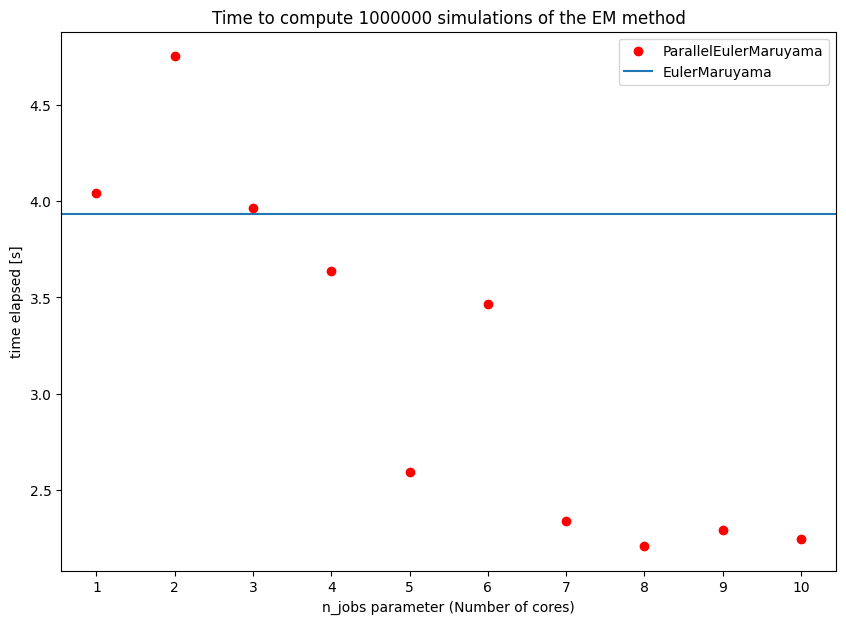

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(n_jobs_values, parallel_results, label="ParallelEulerMaruyama", color="red")
ax.axhline(y=seq_em_time, label="EulerMaruyama")

ax.set_xticks(n_jobs_values)

ax.set_xlabel("n_jobs parameter (Number of cores)")
ax.set_ylabel("time elapsed [s]")
ax.set_title("Time to compute 1000000 simulations of the EM method")

ax.legend(loc=0)

plt.show()

In this simple example encompassing 1,000,000 simulations of the EM method, parallel processing shows improved performance over numpy vectorization when using more than three cores. Compared to the earlier case where we performed 1,000 simulations, the task is much larger. This means we save quite a lot of time through parallelising it, which more than offsets the additional time taken to set up the parallel processing jobs and recombine the array at the end. This sort of pattern is fairly typical of parallel programming - it will tend to slow down smaller tasks, but may speed up larger tasks.